# PreClustering EDA
---


### Imports and Read-In
---

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

#### Read-In

In [2]:
trans_data = pd.read_csv('../data/eth_trans_data_clean.csv')
trans_data['dateTime'] = pd.to_datetime(trans_data['dateTime'])

merged_data = pd.read_csv('../data/price_data_merged_w_trans_count.csv', index_col = 'Date', parse_dates=True)

### General EDA
---

In [3]:
trans_data.head()

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gasPrice,...,hoursOftheday,ethValusd,volatility,dayChange,perc75_Neg,perc75_Neg_lag1,perc75_Neg_lag2,perc75_Neg_lag3,get_out_metric,valueUSD
0,50937,1438996872,0xf32063c80f932845cb3eff4ef1c5e2c641c09e80e20f...,6.0,0xae9906ff37bffbc90ea971c18de8c2664b7b6319b38b...,0,0xc8ebccc5f5689fa8659d83713341e5ad19349448,0x0f87fb507513e749081e34373c84e95e85b5c057,1.000000e+21,55030666693,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68803,1439294010,0x60a38754856bffe131caa33526265918a5baa218f3f1...,48.0,0xa4a2c18349acf0b9729fd1c159714f56ba4bce0f2e44...,0,0xc8ebccc5f5689fa8659d83713341e5ad19349448,0x0f87fb507513e749081e34373c84e95e85b5c057,2.000000e+20,60358589071,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73182,1439364508,0x6532654ed29dece6cd0080ffcf1196ce3e183727ee5b...,50.0,0xbd52d10a10e683623a2ccb49d915f2724c35f11e793f...,0,0xc8ebccc5f5689fa8659d83713341e5ad19349448,0x0f87fb507513e749081e34373c84e95e85b5c057,7.700000e+19,57727183885,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,81978,1439511149,0x805ed4d02b1f3fde47dbfe94b49c521dd68d3c1cd8f6...,60.0,0x815693c882e49a9deae459479b23ba48ad4e718a675b...,1,0xc8ebccc5f5689fa8659d83713341e5ad19349448,0x0f87fb507513e749081e34373c84e95e85b5c057,3.280000e+18,57673142719,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,81987,1439511368,0x430797c846a0098df7625cf76dec146431051f913080...,2.0,0xb2941c957cf27567ea055fb1afbca5e2b8124bb8730c...,0,0x0617194e49baad419b57fb8ebba265e417362835,0x0f87fb507513e749081e34373c84e95e85b5c057,1.840000e+18,58851290487,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269499 entries, 0 to 269498
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   blockNumber        269499 non-null  int64         
 1   timeStamp          269499 non-null  int64         
 2   hash               269499 non-null  object        
 3   nonce              269495 non-null  float64       
 4   blockHash          269495 non-null  object        
 5   transactionIndex   269499 non-null  int64         
 6   from               269499 non-null  object        
 7   to                 269419 non-null  object        
 8   value              269499 non-null  float64       
 9   gasPrice           269499 non-null  int64         
 10  isError            269499 non-null  int64         
 11  input              269495 non-null  object        
 12  contractAddress    269499 non-null  object        
 13  cumulativeGasUsed  269499 non-null  int64   

In [5]:
trans_data.describe()

,blockNumber,timeStamp,nonce,transactionIndex,value,gasPrice,isError,cumulativeGasUsed,gasUsed,confirmations,...,hoursOftheday,ethValusd,volatility,dayChange,perc75_Neg,perc75_Neg_lag1,perc75_Neg_lag2,perc75_Neg_lag3,get_out_metric,valueUSD
count,2.694990e+05,2.694990e+05,2.694950e+05,269499.000000,2.694990e+05,2.694990e+05,269499.000000,2.694990e+05,2.694990e+05,2.694990e+05,...,269499.000000,233856.000000,233856.000000,233856.000000,233856.000000,233856.000000,233856.000000,233856.000000,233856.000000,2.338560e+05
mean,1.427488e+07,1.643593e+09,1.144599e+04,87.141696,1.406211e+19,3.371196e+10,0.011518,7.395592e+06,1.397441e+05,4.955505e+06,...,11.938033,1265.901768,53.710753,1.394863,0.057429,0.066101,0.061482,0.056402,0.183985,4.238084e+04
min,0.000000e+00,1.438270e+09,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.200000e+01,...,0.000000,84.308296,1.120464,-417.918701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,9.494190e+06,1.581857e+09,8.200000e+01,41.000000,0.000000e+00,8.000000e+09,0.000000,3.678958e+06,2.319200e+04,8.167030e+05,...,6.000000,273.754150,15.126392,-13.764008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.783583e+07,1.691082e+09,1.682000e+03,76.000000,0.000000e+00,1.732376e+10,0.000000,6.485709e+06,7.118200e+04,1.398399e+06,...,12.000000,1597.491211,29.056633,-0.283173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,1.841761e+07,1.698120e+09,7.103000e+03,118.000000,7.619048e+15,3.317091e+10,0.000000,9.601603e+06,1.906720e+05,9.728638e+06,...,18.000000,1787.397583,64.040532,11.009979,0.000000,0.000000,0.000000,0.000000,0.000000,5.348565e+00
max,1.923440e+07,1.708013e+09,9.220795e+06,977.000000,5.500000e+22,5.000000e+13,1.000000,3.006217e+07,1.190394e+07,1.922257e+07,...,23.000000,4812.087402,882.349148,501.985107,1.000000,1.000000,1.000000,1.000000,3.000000,1.078936e+08
std,4.996563e+06,6.629998e+07,8.178919e+04,64.090691,3.632342e+20,3.355764e+11,0.106701,5.290606e+06,1.660994e+05,4.994839e+06,...,6.932918,941.993302,67.267624,49.655457,0.232660,0.248458,0.240213,0.230697,0.561620,9.524259e+05


In [6]:
trans_data.corr(numeric_only=True)

,blockNumber,timeStamp,nonce,transactionIndex,value,gasPrice,isError,cumulativeGasUsed,gasUsed,confirmations,hoursOftheday,ethValusd,volatility,dayChange,perc75_Neg,perc75_Neg_lag1,perc75_Neg_lag2,perc75_Neg_lag3,get_out_metric,valueUSD
blockNumber,1.000000,0.999633,0.041380,-0.004441,-0.001946,-0.036476,0.001951,0.290081,0.235549,-0.999999,0.046332,0.765087,0.299520,-0.011737,0.148690,0.144841,0.139879,0.114115,0.170781,0.005004
timeStamp,0.999633,1.000000,0.040594,0.000638,-0.001055,-0.038524,0.002269,0.293962,0.239588,-0.999636,0.047062,0.766612,0.302113,-0.010130,0.150298,0.147167,0.142018,0.117050,0.173930,0.006332
nonce,0.041380,0.040594,1.000000,-0.079299,-0.003384,-0.001831,-0.011063,-0.061921,0.043105,-0.041315,0.011074,0.036550,-0.021944,0.005315,-0.018375,-0.025803,-0.024939,-0.022764,-0.031433,-0.005295
transactionIndex,-0.004441,0.000638,-0.079299,1.000000,0.048408,0.000750,0.005875,0.743250,-0.091901,0.004361,-0.010112,0.149820,0.201041,0.104298,0.062204,0.082024,0.100772,0.136270,0.135365,0.062381
value,-0.001946,-0.001055,-0.003384,0.048408,1.000000,0.006160,-0.004160,0.036590,-0.027527,0.001973,0.006432,0.065937,0.079727,0.019485,0.051830,0.058432,0.067284,0.058985,0.078857,0.974997
gasPrice,-0.036476,-0.038524,-0.001831,0.000750,0.006160,1.000000,-0.003247,-0.004594,0.017160,0.036452,0.007728,0.159425,0.231829,0.072042,0.084442,0.113050,0.100192,0.150796,0.154809,0.057026
isError,0.001951,0.002269,-0.011063,0.005875,-0.004160,-0.003247,1.000000,0.015056,-0.008836,-0.001954,0.002560,-0.023093,-0.022118,-0.003883,-0.011945,-0.017256,-0.017991,-0.017305,-0.022438,-0.004926
cumulativeGasUsed,0.290081,0.293962,-0.061921,0.743250,0.036590,-0.004594,0.015056,1.000000,0.040650,-0.290220,0.013305,0.338245,0.233646,0.086275,0.077439,0.091299,0.106246,0.131087,0.139680,0.051683
gasUsed,0.235549,0.239588,0.043105,-0.091901,-0.027527,0.017160,-0.008836,0.040650,1.000000,-0.235707,-0.009164,0.083719,-0.077402,-0.000420,-0.084572,-0.099837,-0.089848,-0.084044,-0.117120,-0.032816
confirmations,-0.999999,-0.999636,-0.041315,0.004361,0.001973,0.036452,-0.001954,-0.290220,-0.235707,1.000000,-0.046286,-0.764873,-0.299336,0.011760,-0.148601,-0.144737,-0.139781,-0.114011,-0.170650,-0.004977


### Time Analysis
---

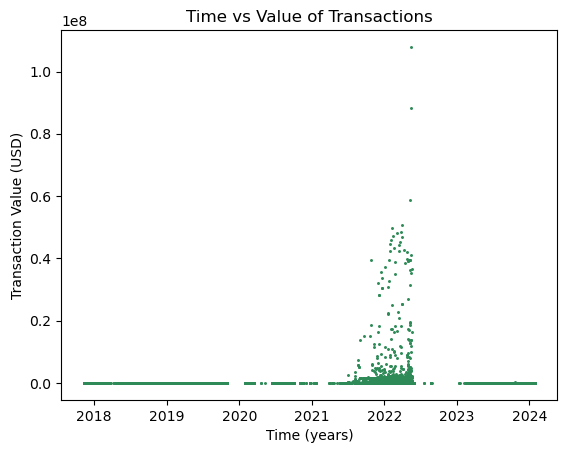

In [7]:
plt.scatter(trans_data['dateTime'], trans_data['valueUSD'],s=0.75, color = 'seagreen')
plt.title('Time vs Value of Transactions')
plt.xlabel('Time (years)')
plt.ylabel('Transaction Value (USD)');

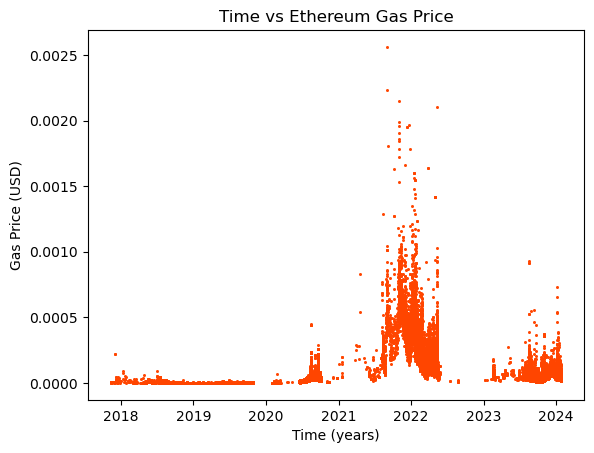

In [8]:
plt.scatter(trans_data['dateTime'],trans_data['gasPrice']*trans_data['ethValusd']/(1000000000000000000), s =0.85, color = 'orangered')
plt.title('Time vs Ethereum Gas Price')
plt.xlabel('Time (years)')
plt.ylabel('Gas Price (USD)');

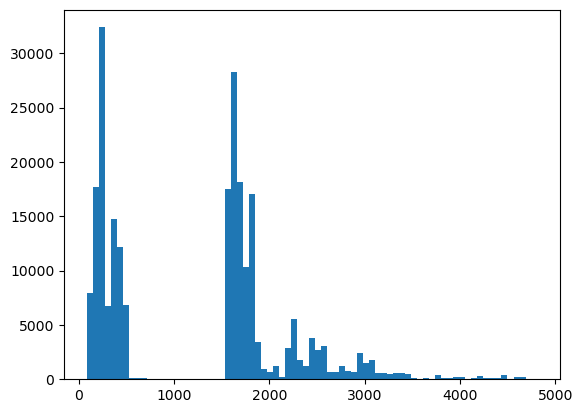

In [9]:
plt.hist(trans_data['ethValusd'], bins= 75);

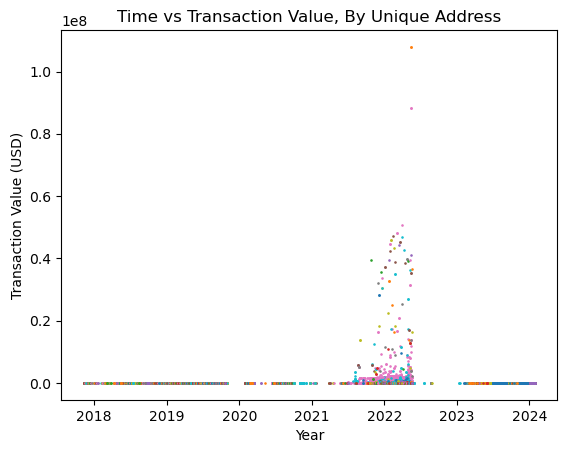

In [11]:
uniqueAddresses = trans_data['from'].unique()

trans_data_half = trans_data.sample(frac=0.5, random_state=42)

for address in uniqueAddresses:
    subset = trans_data_half[trans_data_half['from'] == address]
    plt.scatter(subset['dateTime'], subset['valueUSD'], s = 0.75)

plt.title('Time vs Transaction Value, By Unique Address')
plt.xlabel('Year')
plt.ylabel('Transaction Value (USD)')
plt.show()

#### Time of Trade Analysis
---

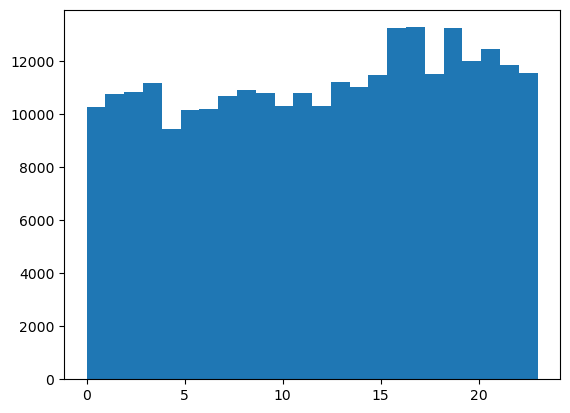

In [12]:
plt.hist(trans_data['hoursOftheday'], bins= 24);

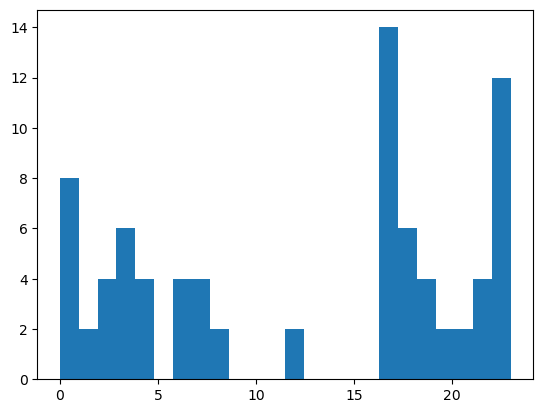

In [13]:
plt.hist(trans_data[trans_data['contractAddress'] != 'no_contract']['hoursOftheday'],bins=24);

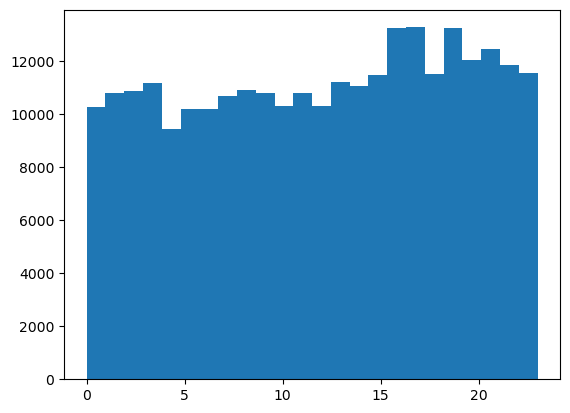

In [14]:
plt.hist(trans_data[trans_data['contractAddress'] == 'no_contract']['hoursOftheday'],bins=24);

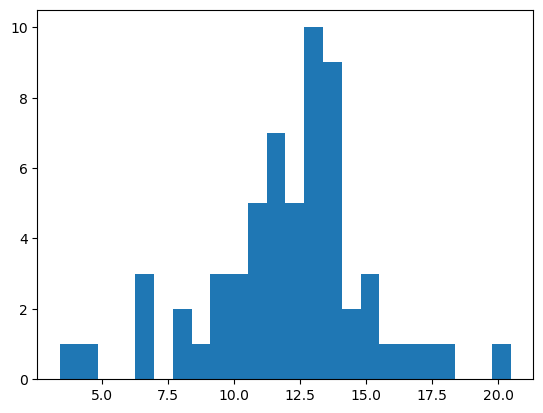

In [15]:

highActiviityaddresses = list(trans_data['from'].value_counts()[:60].index)
from_group = trans_data.groupby('from')
avg_time = []
for i in highActiviityaddresses:
    current_address = from_group.get_group(i)
    avg_time.append(current_address['hoursOftheday'].mean())
    
    
plt.hist(avg_time, bins = 24);

### Price and Trends of Ethereum

In [16]:
merged_data.head()

,Close,Close_1,Close_2,Close_3,Close_4,volatility,dayChange,perc75_Neg,perc75_Neg_lag1,perc75_Neg_lag2,...,0xfff3bab9846675b4fc000601c6865990881dff3d,0xfff401de598bd133cff26be5e79bbee4eed2a0e4,0xfff4520620130fd9dbd7dd0061f3d26eeb945c39,0xfff4f76587c7eadb970b3ffba1cc608882787a42,0xfff841e24c353cd97f6d29cbdc46fb0886217191,0xfffb40347816873ca038756cc87bc610144166b2,0xfffc7d6fa7bd44ebb5b132054c82ad6d23556b3b,0xfffc877a12b4d4a34b8fcf506c71b4a33d844330,0xffff2f58a7e875565b3889fce135300eaceb24ab,GENESIS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-27,2267.885986,2257.208740,2317.064209,2344.493652,2282.544434,71.736637,10.677246,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-26,2267.199707,2267.885986,2257.208740,2317.064209,2344.493652,58.942905,-0.686279,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-25,2217.710205,2267.199707,2267.885986,2257.208740,2317.064209,53.719713,-49.489502,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-24,2233.561768,2217.710205,2267.199707,2267.885986,2257.208740,43.755391,15.851562,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-23,2240.686035,2233.561768,2217.710205,2267.199707,2267.885986,38.804060,7.124268,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


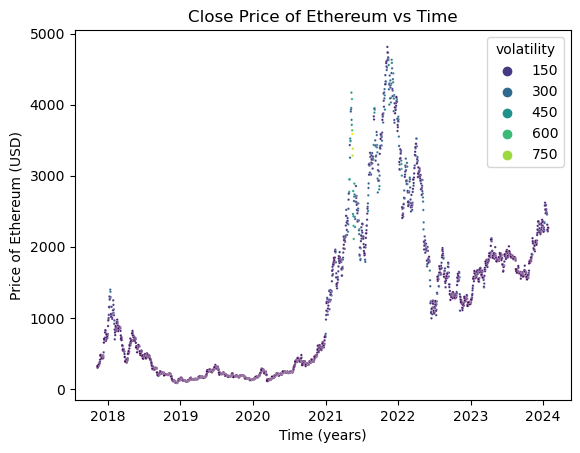

In [17]:
sns.scatterplot(x = merged_data.index, y= merged_data['Close'], data = merged_data , hue = 'volatility', palette = 'viridis', s = 3)
plt.title('Close Price of Ethereum vs Time')
plt.xlabel('Time (years)')
plt.ylabel('Price of Ethereum (USD)');

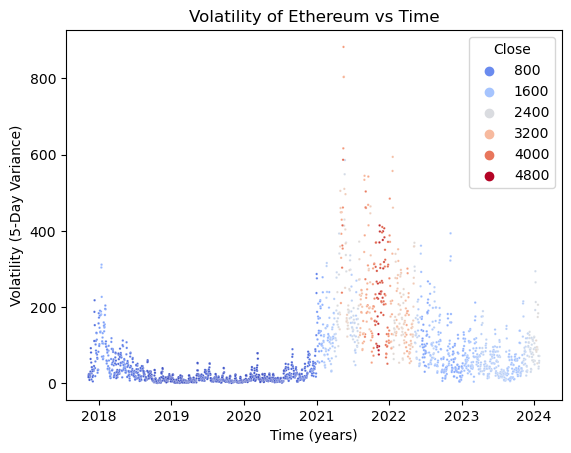

In [18]:
sns.scatterplot(x = merged_data.index, y= merged_data['volatility'], data = merged_data, hue  = merged_data['Close'] ,palette = 'coolwarm', s = 3)
plt.title('Volatility of Ethereum vs Time')
plt.xlabel('Time (years)')
plt.ylabel('Volatility (5-Day Variance)');

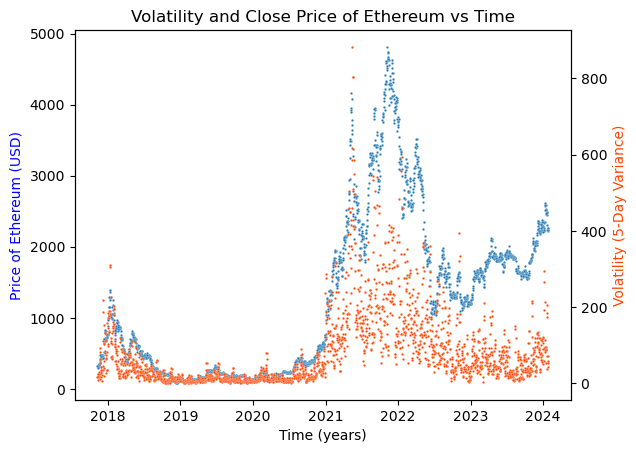

In [19]:
fig, ax1 = plt.subplots()

sns.scatterplot(x=merged_data.index, y=merged_data['Close'], data=merged_data, s=3, ax=ax1)

ax1.set_title('Volatility and Close Price of Ethereum vs Time')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Price of Ethereum (USD)', color='blue')

ax2 = ax1.twinx()

sns.scatterplot(x=merged_data.index, y=merged_data['volatility'], data=merged_data, color = 'orangered' , s=3, ax=ax2)
ax2.set_ylabel('Volatility (5-Day Variance)', color='orangered')


plt.show();

### Abandon Ship Metric
---

In [20]:
trans_data['get_out_metric'].value_counts()

get_out_metric
0.0    207548
1.0     12198
2.0     11502
3.0      2608
Name: count, dtype: int64

In [21]:
merged_data['get_out_metric'].value_counts()

get_out_metric
0.0    1683
1.0     337
2.0     196
3.0      55
Name: count, dtype: int64

In [22]:
print(f"Total number of transactions that effectively , prior to a large drop: {len(trans_data[trans_data['get_out_metric'] > 0]['from'])}")
print(f"Number of unique addresses that effectively {len(trans_data[trans_data['get_out_metric'] > 0]['from'].unique())}")
trans_data[trans_data['get_out_metric'] > 0]['from'].value_counts()

Total number of transactions that effectively , prior to a large drop: 26308
Number of unique addresses that effectively 614


from
0xcd531ae9efcce479654c4926dec5f6209531ca7b    12570
0x58edf78281334335effa23101bbe3371b6a36a51     5378
0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6     2856
0x2008b6c3d07b061a84f790c035c2f6dc11a0be70     2428
0xdfe31c0ae49bc9ad7f184977064fbefef5d76ee9      740
                                              ...  
0xaf3e881d84036b00969a65bf1412016115517c61        2
0x656793cc0570670d24820c207ed25b5bfdbef016        2
0xc414e9f2c1bdf23d14e901bf383a7d7e3f35fb37        2
0xd887ec4ab6d525266b97f10d60c565a733064148        2
0x188759c84937ef879633fcb62b7856731e62d606        2
Name: count, Length: 614, dtype: int64